In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis = 'columns', inplace=True)

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull() 

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [10]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [11]:
df1.loc.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [12]:
df1.TotalCharges.dtypes

dtype('O')

In [13]:
df1['TotalCharges'].dtype

dtype('O')

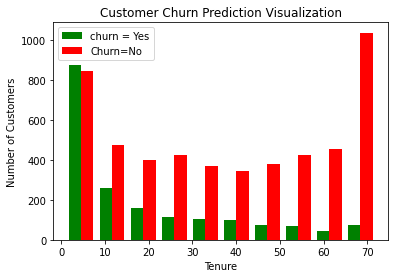

In [14]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green','red'], label = ['churn = Yes', 'Churn=No'])
plt.legend()

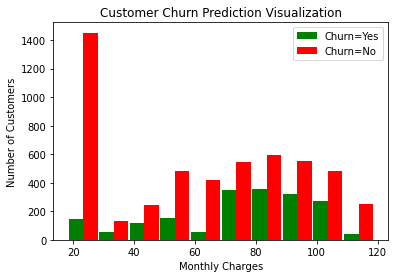

In [15]:
mc_churn_no = df1[df1.Churn =='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'], label = ['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [17]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

c:\Users\Simran Bawaskar\anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

c:\Users\Simran Bawaskar\anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
df1['gender'].replace({'Male':0 , 'Female':1},inplace= True)
df1['gender'].unique()

array([1, 0], dtype=int64)

In [22]:
# One Hot Encoding
df2 = pd.get_dummies(data=df1, columns = ['InternetService','Contract','PaymentMethod'] )
df2.columns

df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1633,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1178,0,0,0,0,15,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3662,1,0,0,0,9,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4054,1,1,0,0,34,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


In [23]:
df2['InternetService_DSL'] = df2['InternetService_DSL'].astype(int)
df2['InternetService_Fiber optic'] = df2['InternetService_Fiber optic'].astype(int)
df2['InternetService_No'] = df2['InternetService_No'].astype(int)
df2['Contract_Month-to-month'] = df2['Contract_Month-to-month'].astype(int)
df2['Contract_One year'] = df2['Contract_One year'].astype(int)
df2['Contract_Two year'] = df2['Contract_Two year'].astype(int)
df2['PaymentMethod_Bank transfer (automatic)'] = df2['PaymentMethod_Bank transfer (automatic)'].astype(int)
df2['PaymentMethod_Credit card (automatic)'] = df2['PaymentMethod_Credit card (automatic)'].astype(int)
df2['PaymentMethod_Electronic check'] = df2['PaymentMethod_Electronic check'].astype(int)
df2['PaymentMethod_Mailed check'] = df2['PaymentMethod_Mailed check'].astype(int)

In [24]:
df2.dtypes
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1940,0,0,0,0,63,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
878,1,0,0,0,60,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
1935,1,0,0,0,51,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4479,1,0,0,0,59,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [25]:
#Scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [26]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3057,0,0,1,1,0.338028,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1990,1,1,0,0,0.211268,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1223,1,0,0,0,0.014085,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
X = df2.drop('Churn',axis='columns')
Y = df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state= 5)

In [29]:
len(X_train.columns)

26

In [30]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer= 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 526us/step - loss: 0.5530 - accuracy: 0.7113
Epoch 2/100
176/176 [==============================] - 0s 603us/step - loss: 0.4380 - accuracy: 0.7931
Epoch 3/100
176/176 [==============================] - 0s 793us/step - loss: 0.4239 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 0s 567us/step - loss: 0.4184 - accuracy: 0.8020
Epoch 5/100
176/176 [==============================] - 0s 555us/step - loss: 0.4162 - accuracy: 0.8036
Epoch 6/100
176/176 [==============================] - 0s 565us/step - loss: 0.4147 - accuracy: 0.8037
Epoch 7/100
176/176 [==============================] - 0s 531us/step - loss: 0.4127 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 0s 613us/step - loss: 0.4123 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 0s 706us/step - loss: 0.4111 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 0s 609us/step - l

In [31]:
model.evaluate (X_test, Y_test)

44/44 [==============================] - 0s 783us/step - loss: 0.4417 - accuracy: 0.7918


[0.44166556000709534, 0.7917554974555969]

In [32]:
yp = model.predict(X_test)
yp[:5]

array([[0.32105702],
       [0.29555696],
       [0.01042724],
       [0.8075001 ],
       [0.40959966]], dtype=float32)

In [33]:
Y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [34]:
Y_pred = []
for element in yp:
    if element > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)


In [35]:
Y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

Text(69.0, 0.5, 'Truth')

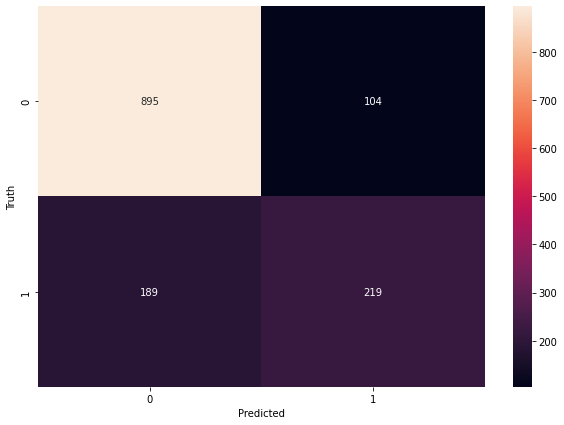

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



### Accuracy

In [37]:
round((882 + 213)/(882+213+117+195) ,2)

0.78

### Precision for 0 class, i.e. Precision for customer who did not churn

In [38]:
precision_churn_no = round(882/(882+195),2)

### Precision for 1 class, i.e. Precision for customer who actually churn

In [39]:
precision_churn_yes =  round(213/(213+117),2)

### Recall for 0 class

In [40]:
recall_churn_no = round(882/(882+117),2)

### Recall for 1 class

In [41]:
recall_churn_yes = round(229/(229+179),2)

### F1 Score for Churn

In [42]:
f1_churn_yes = 2 * (precision_churn_yes * recall_churn_yes) / (precision_churn_yes + recall_churn_yes)
f1_churn_no = 2 * (precision_churn_no * recall_churn_no) / (precision_churn_no + recall_churn_no)

In [43]:
print(f"F1 Score for Churn = Yes: {f1_churn_yes:.2f}")
print(f"F1 Score for Churn = No: {f1_churn_no:.2f}")

F1 Score for Churn = Yes: 0.60
F1 Score for Churn = No: 0.85
